In [1]:
from train_network_energy estimate_H2 import *
from multiprocessing import Pool
import multiprocessing  as mp
import scipy.io as scio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

In [2]:
eps = 0.15 ;  
iters = 60;

In [3]:
# initialization
counts_X = 50 ;
X_list = [4 * pi * np.random.random((2,8)) for i in range(counts_X)] ;

In [4]:
def train(X):
    _ , learning_curve = train_network(X, eps, iters) ;
    return learning_curve

In [5]:
if __name__ == "__main__":
    pool = Pool(processes = mp.cpu_count())
    learning_curves = pool.map(train, X_list)
    pool.close()
    pool.join()

# scio.savemat('numerical_results_energy estimate_H2.mat', {'learning_curves': learning_curves})

In [ ]:
# [ learning_curves[i][-1] for i in range(counts_X) ]

In [ ]:
# learning_curves = scio.loadmat('numerical_results_energy estimate_H2.mat')['learning_curves'];

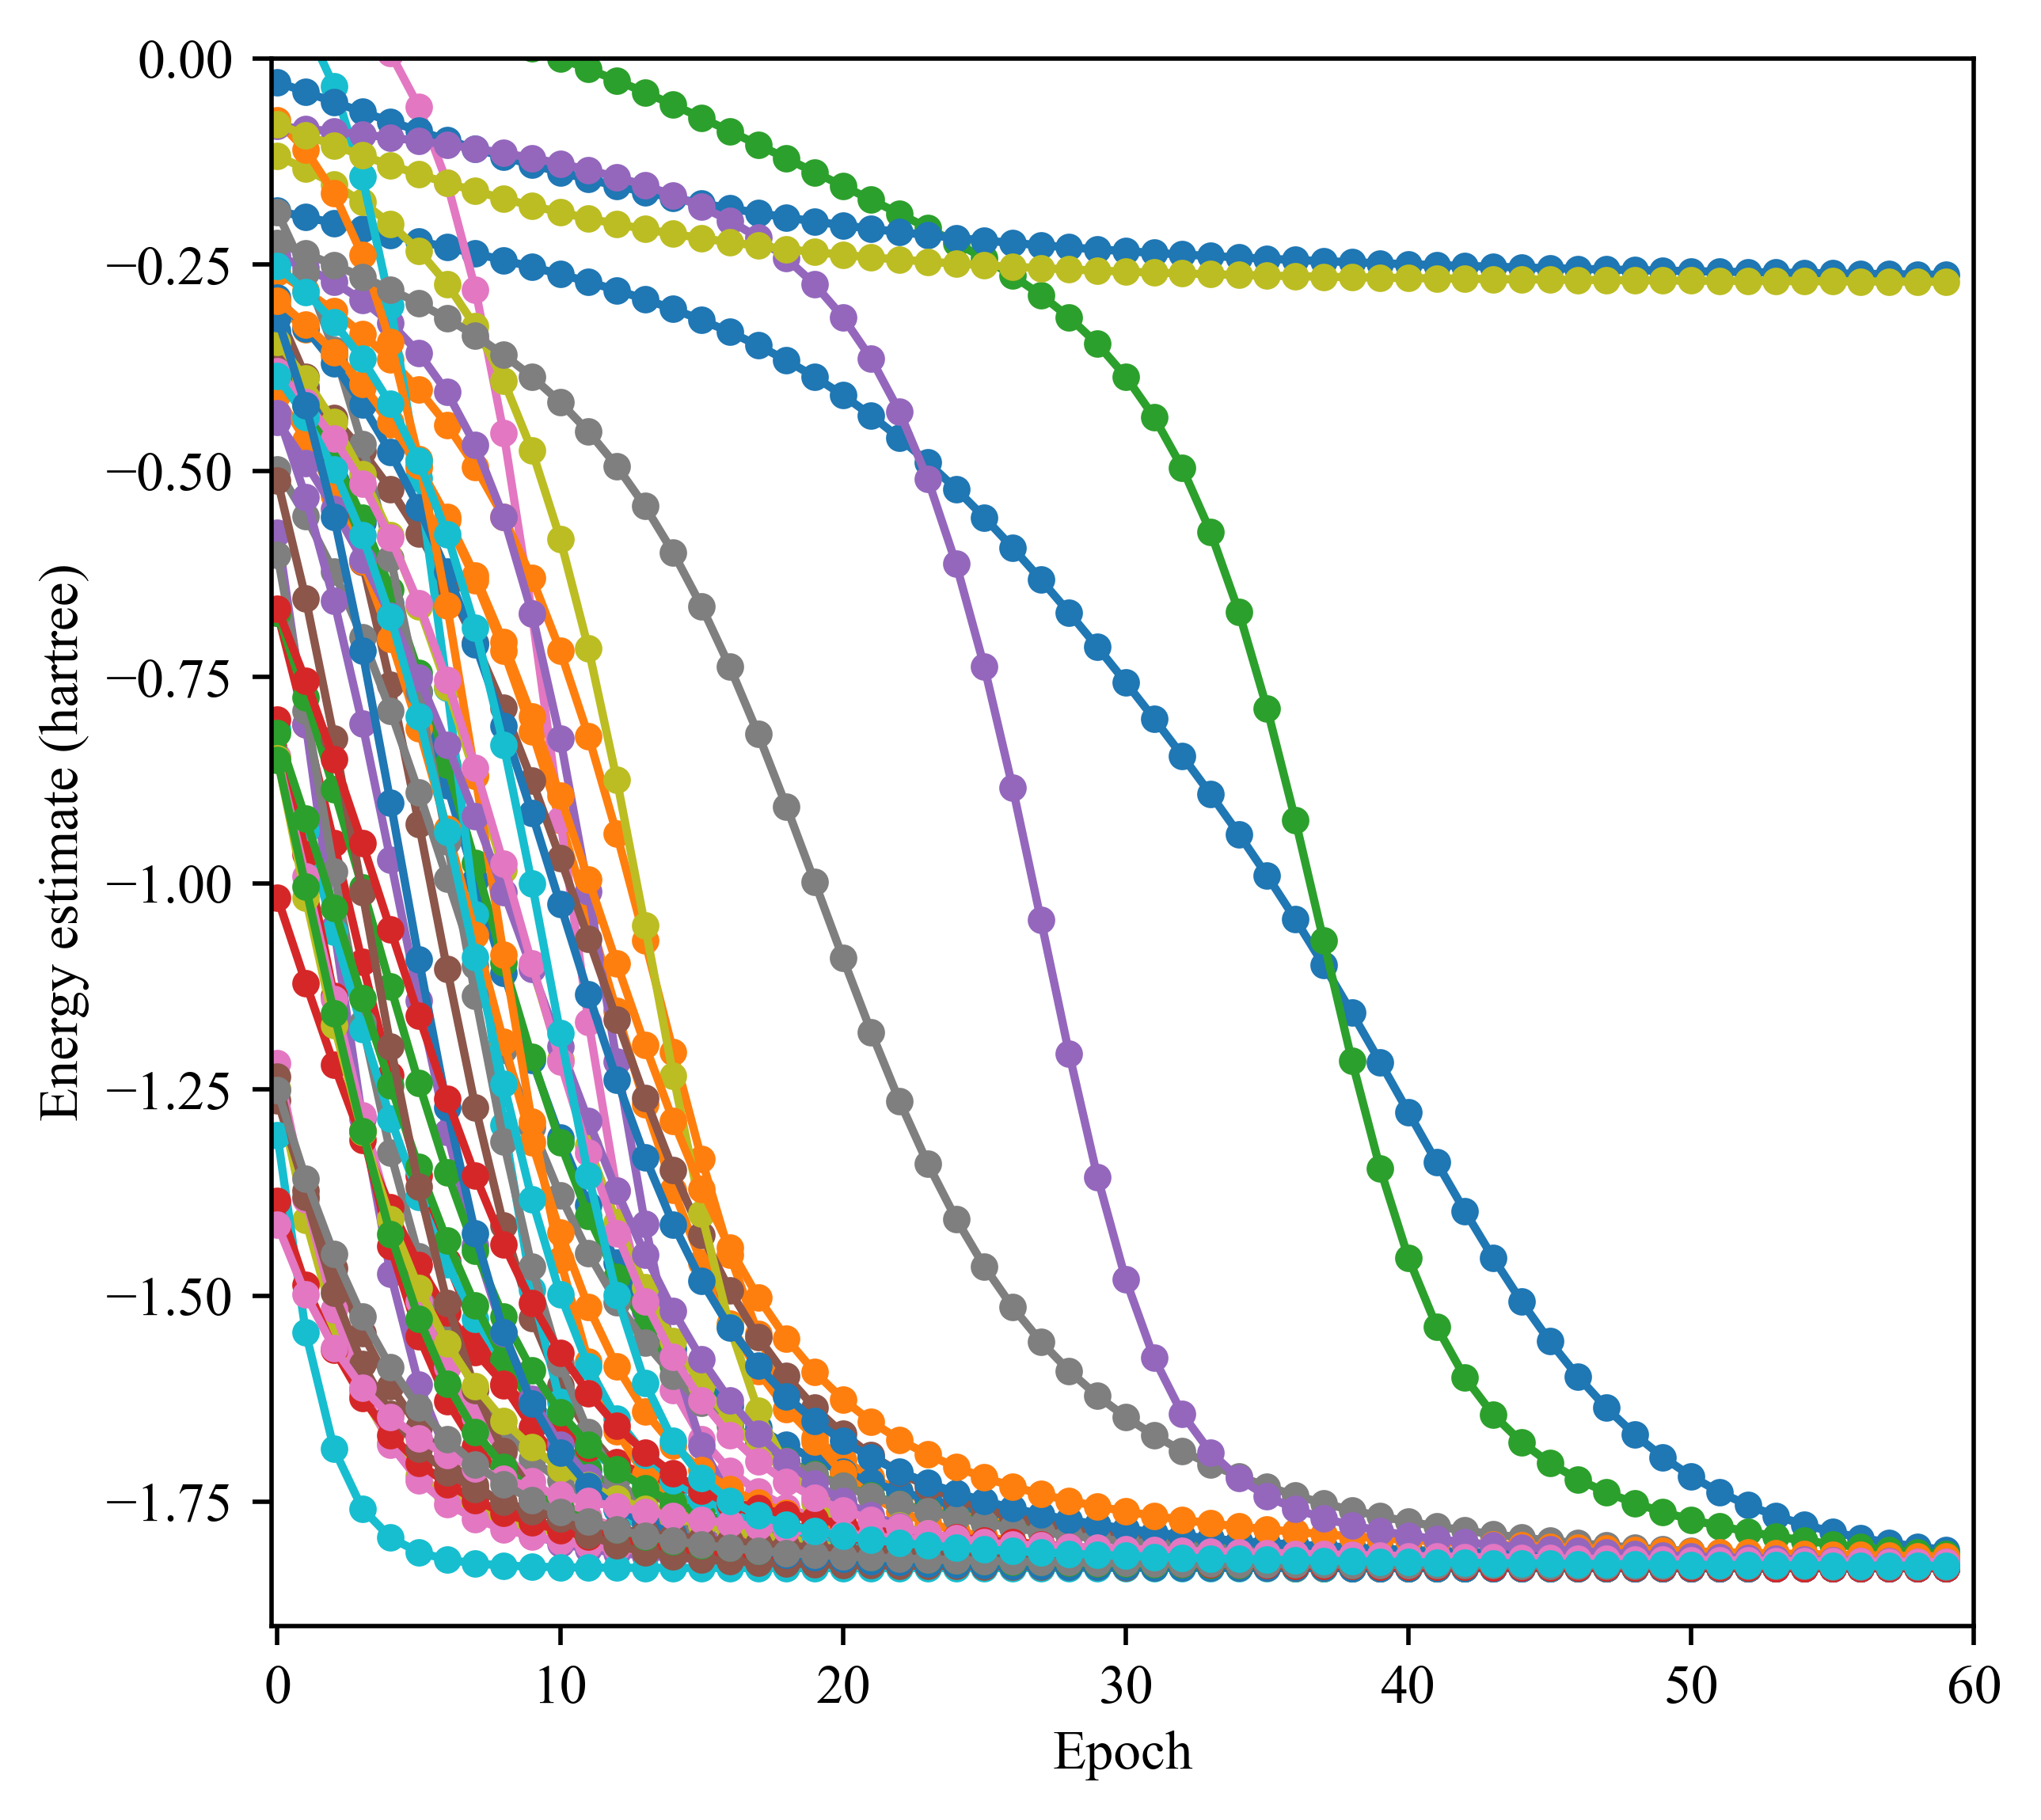

In [6]:
plt.rc('font', family = "Times New Roman", size = 10) #字体样式和大小
fig, ax = plt.subplots(figsize=(5, 4.5), dpi=500)

ax.set_xlim(left = -0.2,right = 60); ax.set_ylim(bottom = -1.9, top = 0)

for i in range(counts_X):
    ax.plot(learning_curves[i], linestyle = '-', marker = 'o', markersize = 4, linewidth = 1.5)
    
ax.set_xlabel('Epoch', labelpad = 3)  
ax.set_ylabel("Energy estimate (hartree)", labelpad = 3)  


#---------------------------------------------------------------------------------------------------
# left, bottom, width, height = 0.7,0.5,0.2,0.3
# ax2 = fig.add_axes([left, bottom, width, height])
# # ax2.set_xlim(left = -1.85, right = -1.8); 
# ax2.set_ylim(bottom = 0, top = 50);

# # 轴坐标范围
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

# # 轴标签 
# ax2.set_ylabel('Proportion', labelpad = 3)
# ax2.set_xlabel('Energy estimate (hartree)', labelpad = 3)

# def make_label(value, pos):
#     return '%0.0f%%' % (100/50. * value)
# ax2.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))


# #作图
# counts = [ learning_curves[i][-1] for i in range(counts_X) ] ;

# ax2.hist(counts, color='green', bins = 3,  rwidth = 0.5, histtype='bar', alpha=0.75, \
#            linestyle = '-', linewidth = 1)


plt.subplots_adjust(left = 0.12, bottom = 0.10, top = 0.98,right = 0.98, hspace = None, wspace = None) ;

In [ ]:
fig.savefig('fig-numerical_result_energy_estimate_H2.pdf', format='pdf')